# 11. Alignment of Model Scales

## Numerical experiments - Week 04/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

The goal of this study is to cross-verify and combine the functionalities of the high-resolution, medium-resolution and low-resolution models, in order to obtain a universal mathematical relationship between cell wall permeability, spore density and spore coverage due to clustering.

## Prerequisite libraries

In [1]:
using PyPlot
using CurveFit
using Revise

Revise.includet("./conversions.jl")
Revise.includet("./diffusion.jl")
Revise.includet("./setup.jl")
Revise.includet("./plotting.jl")
Revise.includet("./analysis.jl")
using .Conversions
using .Diffusion
using .Setup
using .Plotting
using .Analysis

## 1. Spore clusters in the medium and low-resolution models

The first experiment compares a high-resolution simulation of a 2-neighbour and 6-neighbour cluster and asymmetric subsets of these, with varying centre-to-centre distances, on an absorbing-boundary lattice of size $L=256\times 0.2\mu\textrm{m}$, to a medium-resolution and a low-resolution simulation of analogical clusters on a lattice of size $L=256\times 5\mu\textrm{m}$ and $L=64\times 20\mu\textrm{m}$, respectively, with a periodic boundary. This aims to investigate the following questions:
- Does the absorbing boundary bias results compared to a free flow in a much larger space domain?
- Can the medium and low-resolution model be used for a continuation of the distance-versus-decay-exponent function for larger distances?

To this end, a range of center-to-center distances between $2R$ and $20R$ are simulated. The resolution of each model permits a specific sub-range of this set:
- high resolution: $d_s=[2R, 5R]$;
- medium resolution: $d_s=[4R, 40R]$, whereby the direct neighbourhood of spore sites is avoided;
- low resolution: $d_s=[8R, 40R]$.

The basic neighbourhood configurations and the varying spore-to-spore spacings are displayed below.

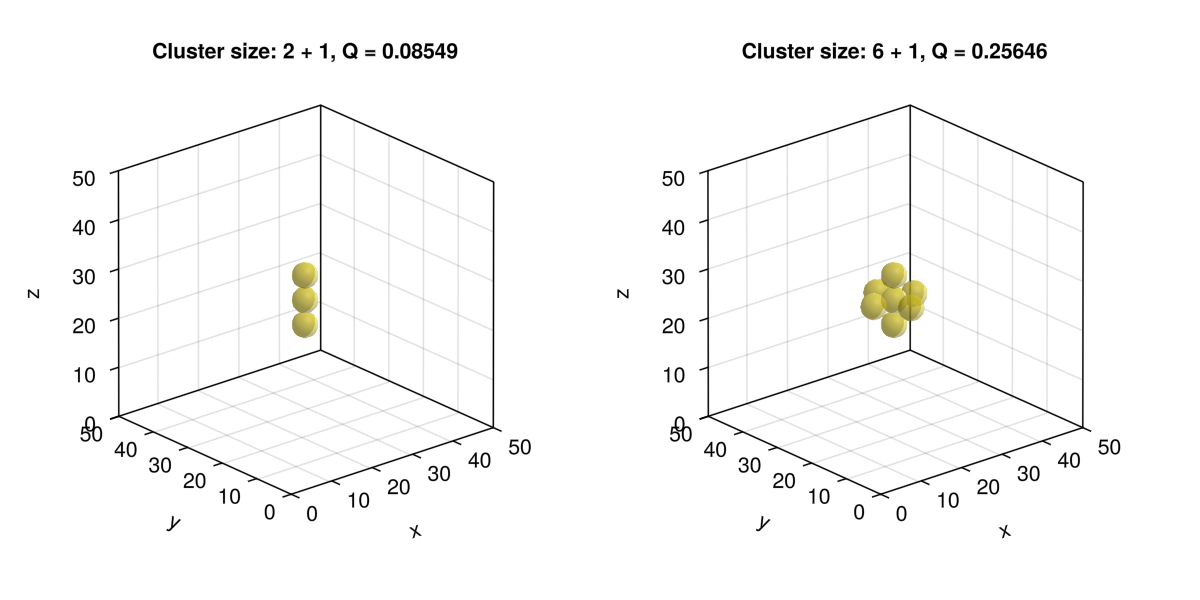

GLMakie.Screen(...)

In [5]:
spore_diameter = 5 # microns
spore_rad = spore_diameter / 2.0
n_nbrs = [2, 6]
plot_spore_clusters(n_nbrs, spore_rad, 50, 2; spore_spacings=[spore_diameter, spore_diameter])

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


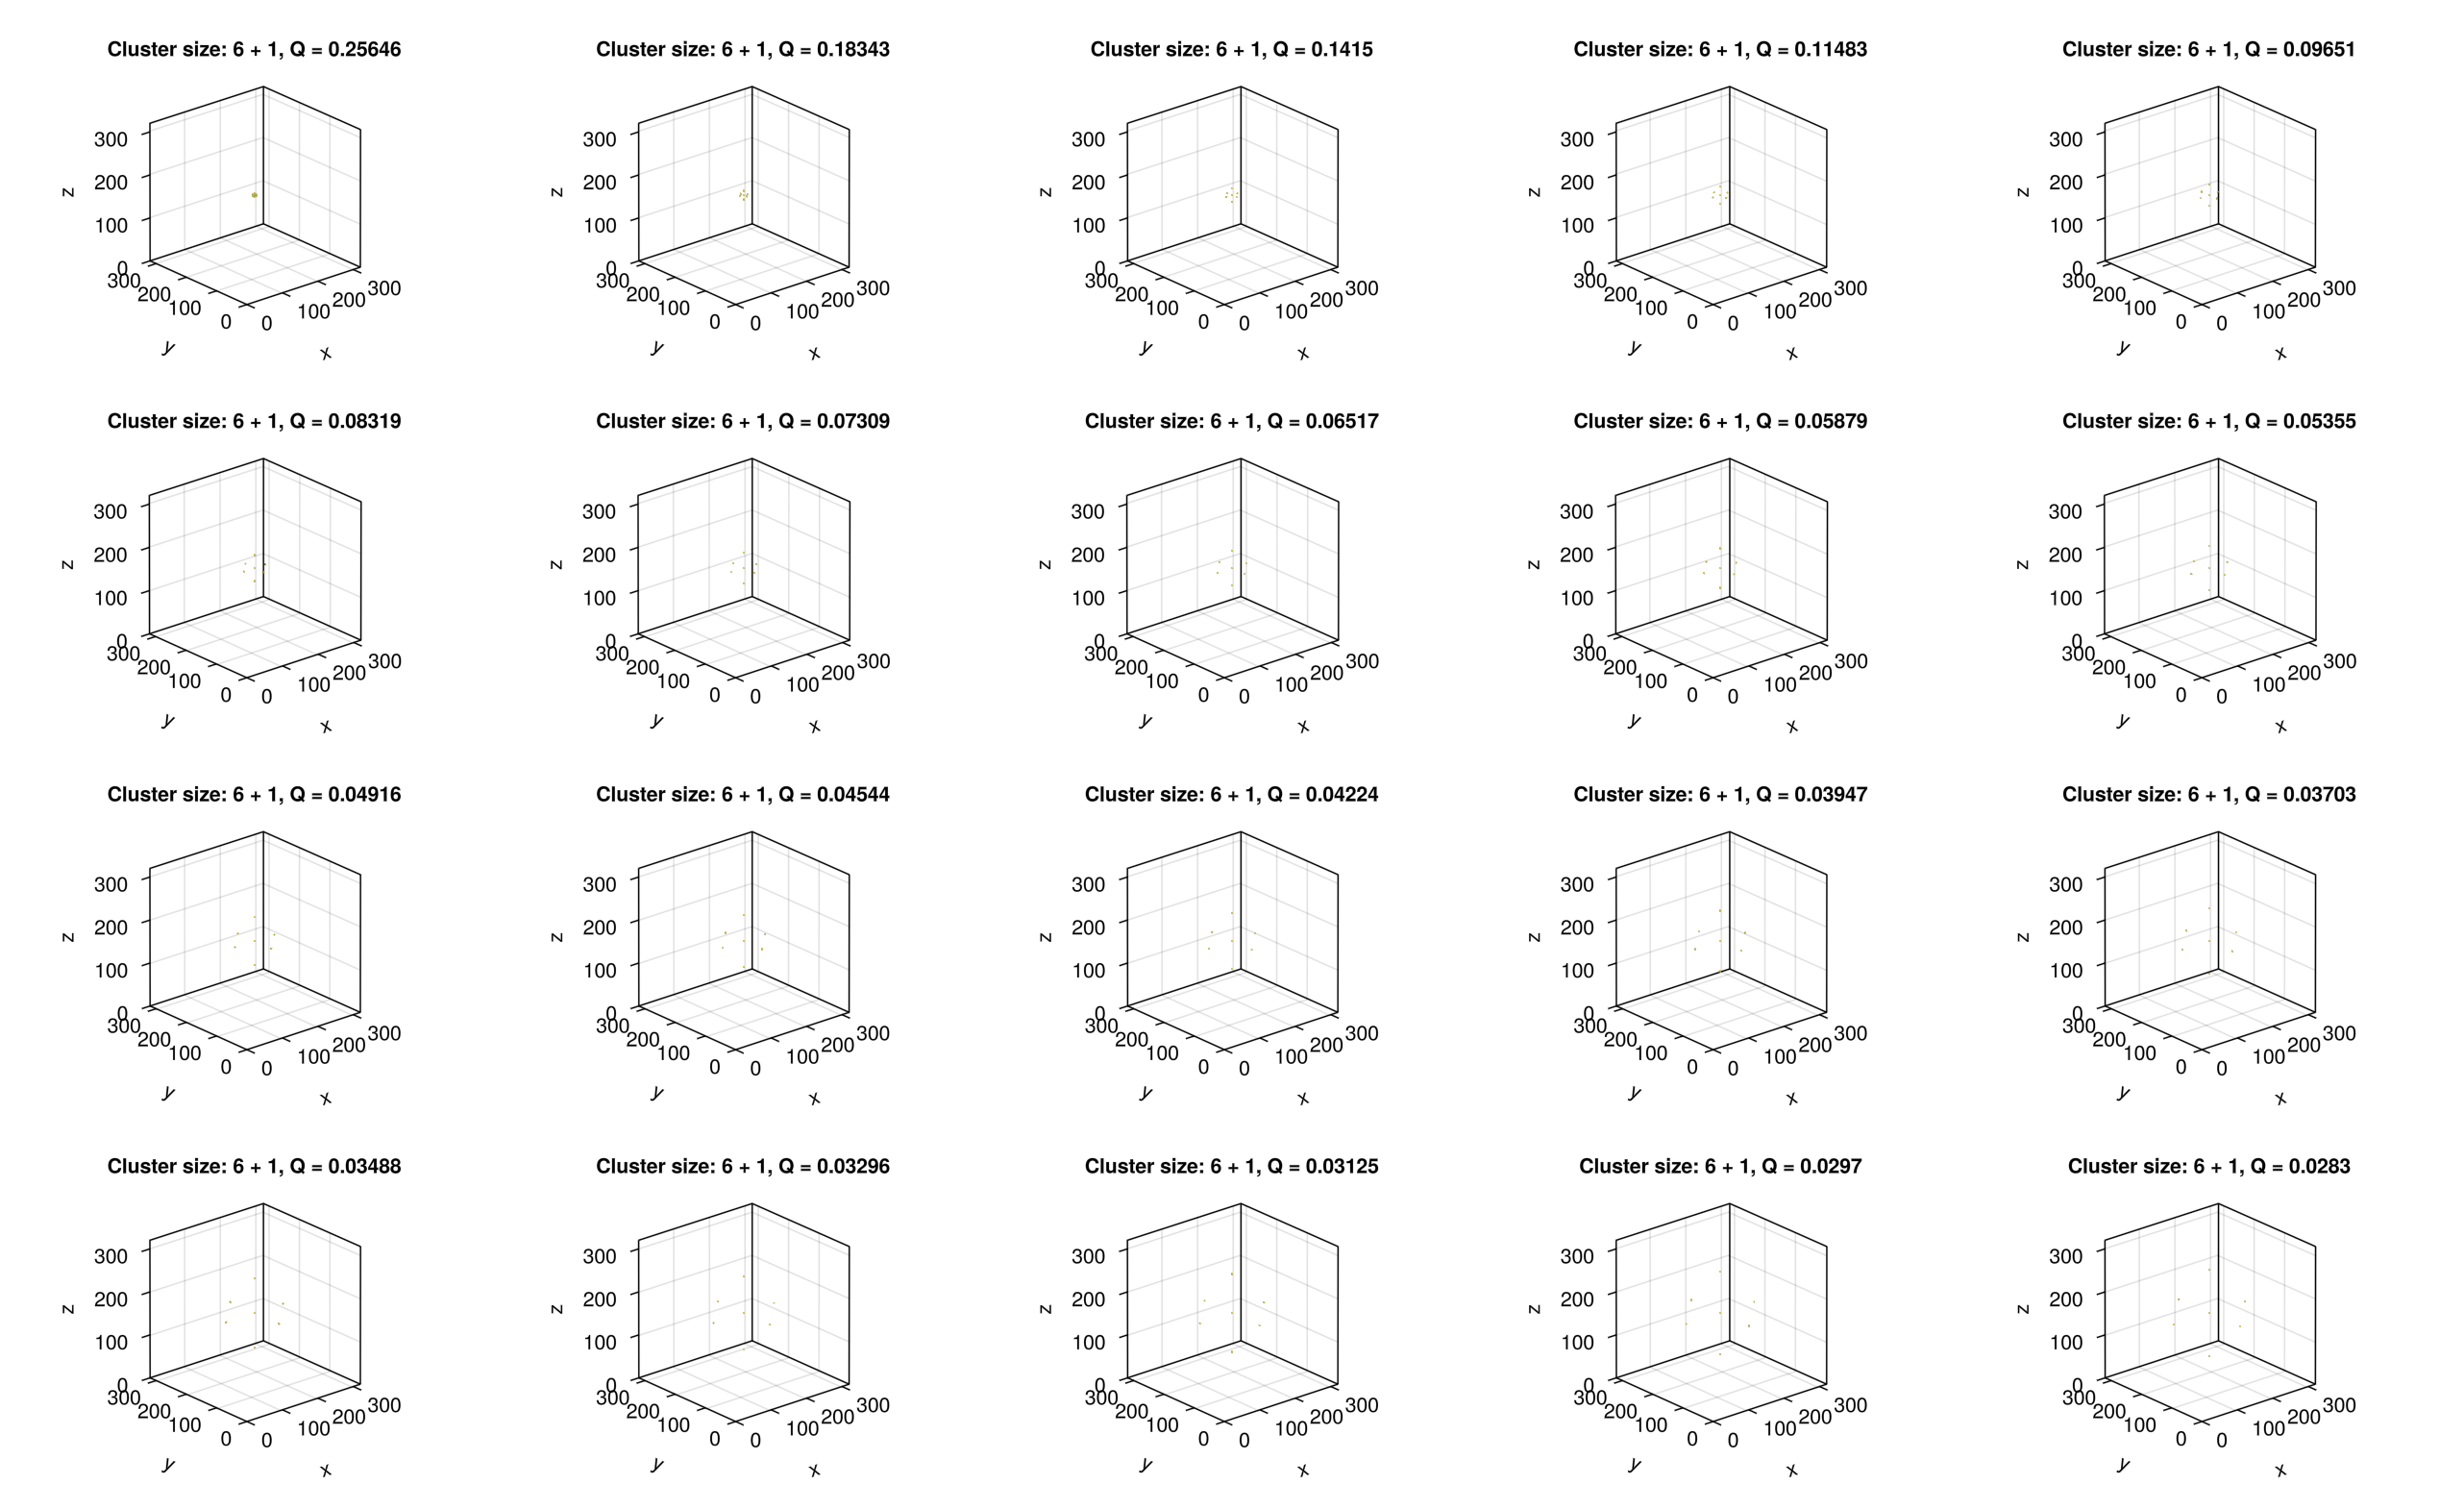

GLMakie.Screen(...)

In [ ]:
# Visualise cluster
spore_diameter = 5 # microns
spore_rad = spore_diameter / 2.0
distances = collect(1:20) * spore_diameter
println(distances)
n_nbrs = [6 for _ in distances]
plot_spore_clusters(n_nbrs, spore_rad, 320, 5; spore_spacings=distances)

The experiments are set up and executed by a dedicated procedure which takes the parameters for each model as an input dictionary and saves the measurement times (`times`), the respective numerical solutions for the inhibitor concentration at the spore (`c_solutions`), 2D sections through the spore and its surrounding environment at the corresponding measurement times (`frame_samples`), the measured spore coverage (`coverage`) and the fitted decay exponent through the concentration evolution (`exponent`). The results can be accessed from the Data directory.

In [ ]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 100#3600 # s
c0_spore = 1.5 # x10^(-5) M
c0_cw = 3.84 # x10^(-5) M
spore_diameter = 5 # microns
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 100
cluster_sizes = [1, 2, 3, 6, 7]
# cluster_sizes = [1, 2, 7]#[2, 3, 6, 7]

# Simulation parameters
sim_params_hi_res = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.2,
    :dt => 0.05,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => collect(1:0.25:2.5) * spore_diameter,
    :abs_bndry => true,
    :solution_method => 0
)

sim_params_mid_res = Dict(
    :sim_res => "medium",
    :N => 256,
    :dx => 5.0,
    :dt => 0.005,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_spore,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => collect(2:20) * spore_diameter
)

sim_params_lo_res = Dict(
    :sim_res => "low",
    :N => 64,
    :dx => 20.0,
    :dt => 0.1,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_spore,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => collect(4:4:20) * spore_diameter
)

sim_params_all = [sim_params_hi_res, sim_params_mid_res, sim_params_lo_res]
# sim_params_all = [sim_params_mid_res]#, sim_params_lo_res]

setup_model_comparison("250407_cluster_scales", sim_params_all)
# setup_model_comparison("250407_cluster_scales", sim_params_all, last_finished=1)

cluster_size = 1
dist = 5.0
Using D = 600, Db = 5.350706139023637e-5, Dcw = 2.6753531888037245e-5
D*dt/dx2 = 749.9999999999999, Db*dt/dx2 = 6.688382673779544e-5, Dcw*dt/dx2 = 3.344191486004655e-5
Timescale for accuracy: 6.666666666666668e-5
Spore radius in lattice units: 12.5
Storage arrays allocated.
1.5290835729782144
Frame 1 saved.1.5284288804925996
Frame 2 saved.1.5277748525730228
Frame 3 saved.1.5271209195914515
Frame 4 saved.1.5264676511759185
Frame 5 saved.1.5258151422644295
Frame 6 saved.1.52516158903488
Frame 7 saved.1.524508510495358
Frame 8 saved.1.5238560965218741
Frame 9 saved.1.5232053914324881
Frame 10 saved.1.5225534521490318
Frame 11 saved.1.5219008482995369
Frame 12 saved.1.5212487191400694
Frame 13 saved.1.5205973494846456
Frame 14 saved.1.519945410201189
Frame 15 saved.1.5192948000498085
Frame 16 saved.1.5186450443404773
Frame 17 saved.1.517995288631146
Frame 18 saved.1.5173458177358312
Frame 19 saved.1.5166960620265002
Frame 20 saved.1.5160456417511308
Frame 21 sav

First, some snapshots from the concentration evolution are plotted for all three models.

(101, 256, 256)
Plotting frames: [1, 101]
Plotting frames: [1, 101]
Plotting frames: [1, 101]


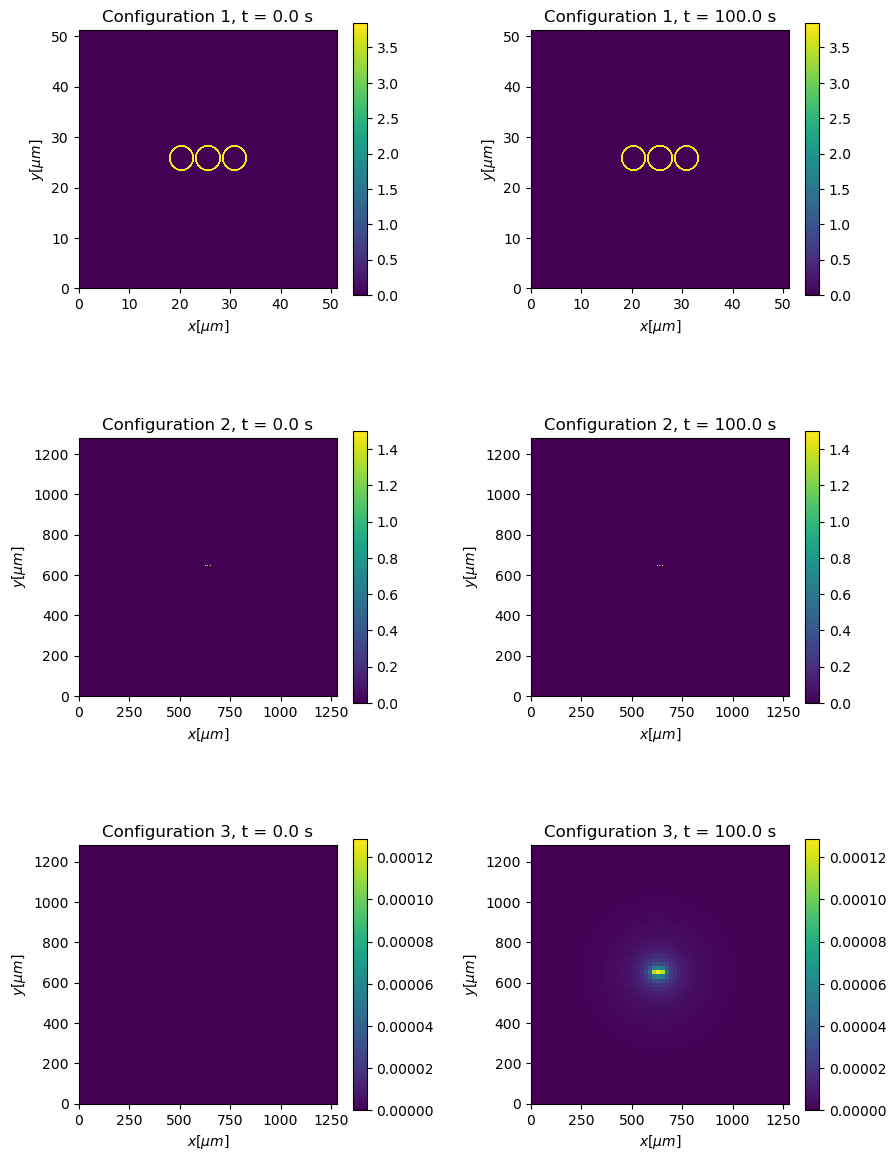

In [3]:
c_frames_compare = []
dx_compare = []
times_compare = []
for i in 1:3
    times, c_frames, params = get_concentration_evolution_from_file("250407_cluster_scales_model_$i", "cluster_size_3_dist_1", get_frames=true)
    push!(c_frames_compare, c_frames)
    push!(dx_compare, params[:dx])
    push!(times_compare, times)
end
println(size(c_frames_compare[1]))
compare_concentration_lattice(c_frames_compare, dx_compare; times=times_compare[1])

???? NEIGHBOURS IN MID AND LOW RES LOOK A BIT SHIFTED, WHY??????

Furthermore, the temporal evolution for the first two cluster sizes and distances for each model is visualised in a comparative plot.

Analytical solution for spore with V=65.44984694978736 and A=78.53981633974483: 1.4526084499209286


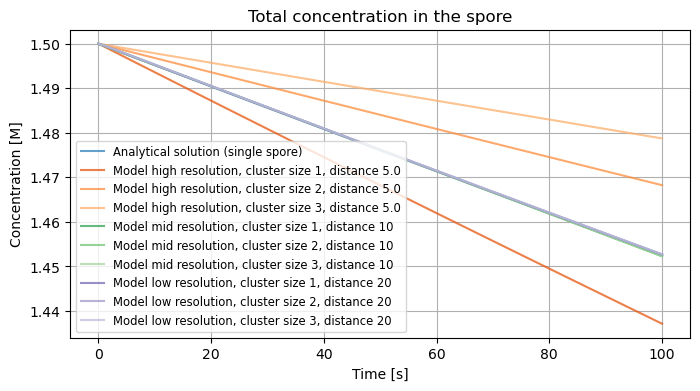

In [41]:
# Analytical solution
c0_spore = 1.5 # x10^(-5) M
spore_diameter = 5 # microns
V_spore_sphere = 4π * (spore_diameter / 2)^3 / 3 # microns^3
A_spore_sphere = 4π * (spore_diameter / 2)^2 # microns^2
Ps_fit = 0.0002675353069511818
times, _, _ = get_concentration_evolution_from_file("250407_cluster_scales_model_1", "cluster_size_1_dist_1")
c_analytical = permeation_time_dependent_analytical(c0_spore, 0, times, Ps_fit, A_spore_sphere, V_spore_sphere)
println("Analytical solution for spore with V=$V_spore_sphere and A=$A_spore_sphere: ", c_analytical[end])

# Plot all solutions for a given distance
dist_idx = 1
times_all = [[times]]
concentrations_all = [[c_analytical]]
labels_all = [["Analytical solution (single spore)"]]
models = ["high", "mid", "low"]
for i in 1:3
    c_sols_group = []
    times_group = []
    labels_group = []
    for j in 1:3
        times, c_sols, params = get_concentration_evolution_from_file("250407_cluster_scales_model_$(i)", "cluster_size_$(j)_dist_1", get_frames=false)
        label = "Model $(models[i]) resolution, cluster size $(params[:cluster_size][1]), distance $(params[:dist][1])"
        push!(c_sols_group, (c_sols ./ c_sols[1]) .* 1.5)
        push!(times_group, times)
        push!(labels_group, label)
    end
    push!(concentrations_all, c_sols_group)
    push!(times_all, times_group)
    push!(labels_all, labels_group)
end
compare_concentration_evolution_groups(concentrations_all, times_all, labels_all)

Finally, an overview of the relationships between spore-to-spore distance and normalised decay exponent is plotted for each cluster size in each model.

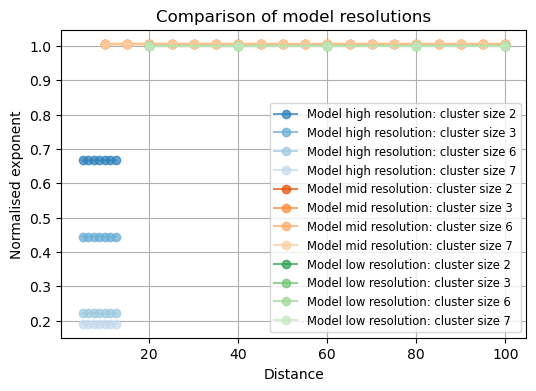

In [6]:
dist_groups = []
exponent_groups = []
group_labels = []
models = ["high", "mid", "low"]
for i in 1:3
    results = get_coverage_and_exponent_from_files("250407_cluster_scales_model_$i", norm_exponent=true)
    # Results per model
    dist_group = []
    exponent_group = []
    group_label = []
    for cluster_size in unique(results[:cluster_size])[2:end]
        # Results per cluster size
        push!(dist_group, [results[:dist][i] for i in eachindex(results[:dist]) if results[:cluster_size][i] == cluster_size])
        push!(exponent_group, [results[:exponent][i] for i in eachindex(results[:exponent]) if results[:cluster_size][i] == cluster_size])
        push!(group_label, "Model $(models[i]) resolution: cluster size $cluster_size")
    end
    push!(dist_groups, dist_group)
    push!(exponent_groups, exponent_group)
    push!(group_labels, group_label)
end
compare_functional_relationships_groups(dist_groups, exponent_groups, ["Distance", "Normalised exponent"], group_labels, "Comparison of model resolutions")

The results from the medium and low-resolution models indicate that the blocking effect of neighbour spores quickly diminishes as soon as there is as little as one spore diameter distance between the boundaries of the cluster members. This is in stark contradiction to the results from the high-resolution simulations, where the decay exponent is visibly modulated by the number of spore neighbours even at growing spore-to-spore distances. This proves the necessity to revisit the high-resolution scheme and investigate whether the implicit solution method plays a role in biasing the simulation results.

## 2. Revisiting the high-resolution scheme

The following code attempts to pinpoint the effects of the solution scheme and the type of boundary condition in the high-resolution model by coarse-graining the previous spatial subdivision from $\Delta{x}=0.2\ \mu\textrm{m}$ to $\Delta{x}=0.4\ \mu\textrm{m}$. Three cluster sizes are examined: a single spore, a spore with one neighbour and a fully surrounded spore with 12 neighbours. The simulation is run for $t_\textrm{max}=0.02$ seconds using an explicit solution method (Forward Euler) and an implicit solution method (Backward Euler).

Furthermore, an attempt to alleviate round-off errors and condition the problem better (e.g. when using the implicit solver) is made by non-dimensionalising the variables in the model. For this, the fast diffusion constant, $D=600\ \mu\textrm{m}$, is used as a reference, such that the diffusion through the medium is normalised:

$$
\begin{equation}
\tilde{D}=\frac{D}{D}=1.
\end{equation}
$$

Using a length scale equal to the diameter of the spore, $l_R=5\ \mu\textrm{m}$, a time scale can be derived:

$$
\begin{equation}
t_R=\frac{l_R^2}{D}.
\end{equation}
$$

The rest of the variables re-scale as follows:

$$
\begin{equation}
\tilde{dx}=\frac{dx}{l_R},
\end{equation}
$$

$$
\begin{equation}
\tilde{dt}=\frac{dt}{t_R},
\end{equation}
$$

$$
\begin{equation}
\tilde{P_s}=\frac{P_sl_R}{D}.
\end{equation}
$$

As the concentration scale is not intrinsically relevant for the numerical procedure, it can remain unscaled.

The non-dimensionalised scheme is tested with the implicit and the explicit solver and compared to their standard dimensioned counterparts.

In [ ]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 1.0#3600 # s
c0_spore = 1.5 # x10^(-5) M
c0_cw = 3.84 # x10^(-5) M
spore_diameter = 5 # microns
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 10
cluster_sizes = [1, 2, 7, 13]
# cluster_sizes = [2, 3, 6, 7]
# cluster_sizes = [1, 13]#[1, 2, 7, 13]
distances = collect(1:0.5:2.5) * spore_diameter
# distances = collect(1:0.5:1.5) * spore_diameter

# Simulation parameters
sim_params_hi_res_explicit_dim = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    :dt => 0.000025,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 2, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.65,
    :nondim => false
)

sim_params_hi_res_explicit_nondim = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    :dt => 0.000025,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 2, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.65,
    :nondim => true
)

sim_params_hi_res_implicit_dim = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    :dt => 0.01,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 0, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.65,
    :nondim => false
)

sim_params_hi_res_implicit_nondim = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    # :dt => 0.001, # 1 order smaller than dim version
    :dt => 0.01,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 0, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.65,
    :nondim => true
)

# run_simulations("250403_high_res_revisit", sim_params_hi_res_implicit)
# sim_params_all = [sim_params_hi_res_explicit_dim, sim_params_hi_res_explicit_nondim, sim_params_hi_res_implicit_dim, sim_params_hi_res_implicit_nondim]
# sim_params_all = [sim_params_hi_res_explicit_nondim, sim_params_hi_res_implicit_dim, sim_params_hi_res_implicit_nondim]
sim_params_all = [sim_params_hi_res_implicit_nondim]
setup_model_comparison("250403_high_res_revisit", sim_params_all, last_finished=3)

cluster_size = 1
dist = 5.0
New simulation with parameters Dict{Symbol, Any}(:Ps => 0.0002675353069511818, :abs_bndry => true, :D => 600, :sim_res => "high", :cluster_size => 1, :c0 => 3.84, :N => 256, :corr_factor => 0.55, :solution_method => 0, :n_save_frames => 10, :t_max => 1.0, :dist => 5.0, :nondim => true, :dt => 0.01, :dx => 0.4) added with simID cluster_size_1_dist_1.
Spore radius in lattice units: 6.25
Parameters rescaled to D = 5.60673661018398e6, Db = 1.0, dt = 4.2805649112189094e-8, dx = 0.08, t_max = 4.280564911218909e-6
Using D = 5.60673661018398e6, Db = 1.0, Dcw = 0.5000000445892218
D*dt/dx2 = 37.5, Db*dt/dx2 = 6.688382673779546e-6, Dcw*dt/dx2 = 3.3441916351195514e-6
Timescale for accuracy: 1.1414839763250425e-9
Storage arrays allocated.
1.5119294471068199
Frame 1 saved.1.5118629850673393
Frame 2 saved.1.5117959597902362
Frame 3 saved.1.5117287467672589
Frame 4 saved.1.5116617214901555
Frame 5 saved.1.511595165577738
Frame 6 saved.1.5115285157923832
Frame 7 saved.1.5114

Analytical solution for spore with V=65.44984694978736 and A=78.53981633974483: 1.499518513740368


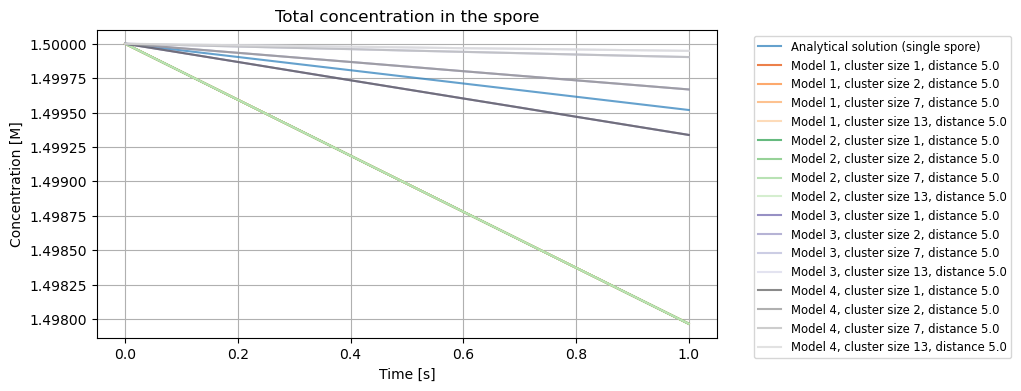

In [42]:
# Analytical solution
c0_spore = 1.5 # x10^(-5) M
spore_diameter = 5 # microns
V_spore_sphere = 4π * (spore_diameter / 2)^3 / 3 # microns^3
A_spore_sphere = 4π * (spore_diameter / 2)^2 # microns^2
Ps_fit = 0.0002675353069511818
times, _, _ = get_concentration_evolution_from_file("250403_high_res_revisit_model_1", "cluster_size_2_dist_1")
c_analytical = permeation_time_dependent_analytical(c0_spore, 0, times, Ps_fit, A_spore_sphere, V_spore_sphere)
println("Analytical solution for spore with V=$V_spore_sphere and A=$A_spore_sphere: ", c_analytical[end])

# Plot all solutions for a given distance
dist_idx = 1
times_all = [[times]]
concentrations_all = [[c_analytical]]
labels_all = [["Analytical solution (single spore)"]]
for i in 1:4
    times_group = []
    concentrations_group = []
    labels_group = []
    for j in 1:4
        times, concentrations, params = get_concentration_evolution_from_file("250403_high_res_revisit_model_$(i)", "cluster_size_$(j)_dist_$(dist_idx)")
        label = "Model $(i), cluster size $(params[:cluster_size][1]), distance $(params[:dist][1])"
        concentrations .= (concentrations ./ concentrations[1]) .* 1.5
        # println(concentrations[1])
        push!(labels_group, label)
        push!(times_group, times)
        push!(concentrations_group, concentrations)
    end
    
    push!(times_all, times_group)
    push!(concentrations_all, concentrations_group)
    push!(labels_all, labels_group)
end
compare_concentration_evolution_groups(concentrations_all, times_all, labels_all)

Plotting frames: [1, 11]


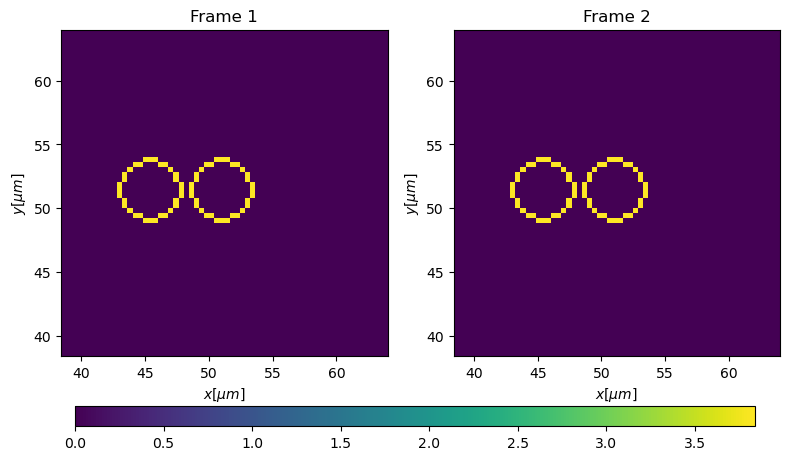

In [4]:
times, concentrations, params = get_concentration_evolution_from_file("250403_high_res_revisit_model_1", "cluster_size_2_dist_1", get_frames=true)
plot_concentration_lattice(concentrations, params[:dx], frame_indices=[1,11], zoom=0.25)

The results show that the explicit solver largely underestimates the concentration evolution compared to the implicit solver. The non-dimensionalisation appears to have no added benefit to the flexibility of the timestep and the improvement of the solution accuracy.

The single-spore experiment using the implicit method comes closest to the analytical prediction of the concentrations but exhibits a slightly faster release. The medium- and low-resolution experiments therefore still have the highest accuracy compared to the analytical solution, as seen in the previous simulations. To narrow down the causes for this, the high-resolution setup is run with a Crank-Nicolson solver and a periodic boundary instead of an absorbing one.

In [3]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 100.0#3600 # s
c0_spore = 1.5 # x10^(-5) M
c0_cw = 3.84 # x10^(-5) M
spore_diameter = 5 # microns
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 10
cluster_sizes = [1, 2, 7, 13]
# cluster_sizes = [2, 3, 6, 7]
# cluster_sizes = [1, 13]#[1, 2, 7, 13]
distances = collect(1:0.5:2.5) * spore_diameter
# distances = collect(1:0.5:1.5) * spore_diameter

# Simulation parameters
sim_params_hi_res_backwd_euler = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    :dt => 0.01,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => false,
    :solution_method => 0, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.55,
    :nondim => false
)

sim_params_hi_res_crank_nicolson = Dict(
    :sim_res => "high",
    :N => 256,
    :dx => 0.4,
    # :dt => 0.001, # 1 order smaller than dim version
    :dt => 0.001,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_cw,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => false,
    :solution_method => 1, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
    :corr_factor => 0.55,
    :nondim => true
)

# sim_params_all = [sim_params_hi_res_backwd_euler, sim_params_hi_res_crank_nicolson]
sim_params_all = [sim_params_hi_res_crank_nicolson]
setup_model_comparison("250403_high_res_revisit_cn_vs_be", sim_params_all, last_finished=1)

cluster_size = 1
dist = 5.0
Simulation with parameters Dict{Symbol, Any}(:Ps => 0.0002675353069511818, :abs_bndry => false, :D => 600, :sim_res => "high", :cluster_size => 1, :c0 => 3.84, :N => 256, :corr_factor => 0.55, :solution_method => 1, :n_save_frames => 10, :t_max => 100.0, :dist => 5.0, :nondim => true, :dt => 0.001, :dx => 0.4) already exists with simID cluster_size_1_dist_1. Overwriting it.
Spore radius in lattice units: 6.25
Parameters rescaled to D = 5.60673661018398e6, Db = 1.0, dt = 4.280564911218909e-9, dx = 0.08, t_max = 0.00042805649112189094
Using D = 5.60673661018398e6, Db = 1.0, Dcw = 0.5000000445892218
D*dt/dx2 = 3.7499999999999996, Db*dt/dx2 = 6.688382673779545e-7, Dcw*dt/dx2 = 3.344191635119551e-7
Timescale for accuracy: 1.1414839763250425e-9
Storage arrays allocated.
1.5119294471068199
Frame 1 saved.1.498404508940036
Frame 2 saved.1.48518233341288
Frame 3 saved.1.4722283108344156
Frame 4 saved.1.4596340242959376
Frame 5 saved.1.4475138040294142
Frame 6 saved.1.

Analytical solution for spore with V=65.44984694978736 and A=78.53981633974483: 1.4526084499209286


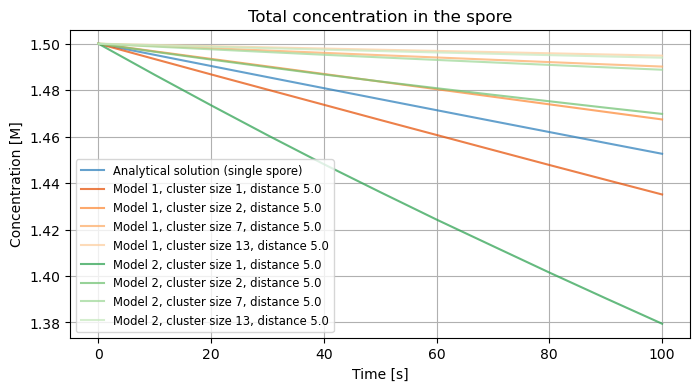

In [40]:
# Analytical solution
c0_spore = 1.5 # x10^(-5) M
spore_diameter = 5 # microns
V_spore_sphere = 4π * (spore_diameter / 2)^3 / 3 # microns^3
A_spore_sphere = 4π * (spore_diameter / 2)^2 # microns^2
Ps_fit = 0.0002675353069511818
times, _, _ = get_concentration_evolution_from_file("250403_high_res_revisit_cn_vs_be_model_1", "cluster_size_1_dist_1")
c_analytical = permeation_time_dependent_analytical(c0_spore, 0, times, Ps_fit, A_spore_sphere, V_spore_sphere)
println("Analytical solution for spore with V=$V_spore_sphere and A=$A_spore_sphere: ", c_analytical[end])

# Plot all solutions for a given distance
dist_idx = 1
times_all = [[times]]
concentrations_all = [[c_analytical]]
labels_all = [["Analytical solution (single spore)"]]
for i in 1:2
    times_group = []
    concentrations_group = []
    labels_group = []
    for j in 1:4
        times, concentrations, params = get_concentration_evolution_from_file("250403_high_res_revisit_cn_vs_be_model_$(i)", "cluster_size_$(j)_dist_$(dist_idx)")
        label = "Model $(i), cluster size $(params[:cluster_size][1]), distance $(params[:dist][1])"
        concentrations .= concentrations ./ concentrations[1] .* 1.5
        # println(concentrations[1])
        push!(labels_group, label)
        push!(times_group, times)
        push!(concentrations_group, concentrations)
    end
    
    push!(times_all, times_group)
    push!(concentrations_all, concentrations_group)
    push!(labels_all, labels_group)
end
compare_concentration_evolution_groups(concentrations_all, times_all, labels_all)

## 3. Implicit solution of the medium-resolution scheme

Since the implicit and explicit solutions of the high-resolution scheme are found to misalign significantly, a similar comparison is conducted with the medium-resolution cluster simulation to investigate the discrepancy. An absorbing boundary is introduced for a closer match of the experimental setups.

In [41]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 1000#3600 # s
c0_spore = 1.5 # x10^(-5) M
c0_cw = 3.84 # x10^(-5) M
spore_diameter = 5 # microns
spore_rad = spore_diameter / 2.0
V_spore_sphere = 4π * (spore_diameter / 2)^3 / 3 # microns^3
A_spore_sphere = 4π * (spore_diameter / 2)^2 # microns^2
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 10
# cluster_sizes = [1, 2, 3, 6, 7]
cluster_sizes = [1, 7]#[2, 3, 6, 7]
# distances = collect(2:20) * spore_diameter
distances = collect(2:3) * spore_diameter

# Simulation parameters
sim_params_mid_res_explicit = Dict(
    :sim_res => "medium",
    :N => 256,
    :dx => 5.0,
    :dt => 0.005,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_spore,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 2, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
)

sim_params_hi_res_implicit = Dict(
    :sim_res => "medium",
    :N => 256,
    :dx => 5.0,
    :dt => 100.0,
    :t_max => t_max,
    :D => D,
    :Ps => Ps_fit,
    :c0 => c0_spore,
    :n_save_frames => n_save_frames,
    :cluster_size => cluster_sizes,
    :dist => distances,
    :abs_bndry => true,
    :solution_method => 0, # 0: Backward Euler, 1: Crank-Nicolson, 2: Forward Euler
)

# sim_params_all = [sim_params_hi_res_explicit, sim_params_hi_res_implicit]
sim_params_all = [sim_params_hi_res_implicit]
setup_model_comparison("250403_mid_res_implicit_vs_explicit", sim_params_all)

cluster_size = 1
dist = 10
New simulation with parameters Dict{Symbol, Any}(:Ps => 0.0002675353069511818, :abs_bndry => true, :D => 600, :sim_res => "medium", :cluster_size => 1, :c0 => 1.5, :N => 256, :solution_method => 0, :n_save_frames => 10, :t_max => 1000, :dist => 10, :dt => 100.0, :dx => 5.0) added with simID cluster_size_1_dist_1.
Using D = 600, Db = 0.0013376765347559091, Dcw = 0.0006688390129531655
D*dt/dx2 = 2400.0, Db*dt/dx2 = 0.0053507061390236366, Dcw*dt/dx2 = 0.002675356051812662
Timescale for accuracy: 0.041666666666666664
Spore radius in lattice units: 1.0
Storage arrays allocated.
Frame 10 saved.cluster_size = 7
dist = 10
New simulation with parameters Dict{Symbol, Any}(:Ps => 0.0002675353069511818, :abs_bndry => true, :D => 600, :sim_res => "medium", :cluster_size => 7, :c0 => 1.5, :N => 256, :solution_method => 0, :n_save_frames => 10, :t_max => 1000, :dist => 10, :dt => 100.0, :dx => 5.0) added with simID cluster_size_2_dist_1.
Using D = 600, Db = 0.00133767653475

In [17]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 100#3600 # s
c0_spore = 1.5 # x10^(-5) M
c0_cw = 3.84 # x10^(-5) M
spore_diameter = 5 # microns
spore_rad = spore_diameter / 2.0
V_spore_sphere = 4π * (spore_diameter / 2)^3 / 3 # microns^3
A_spore_sphere = 4π * (spore_diameter / 2)^2 # microns^2
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 10

N = 256
dx = 5.0
dt = 10.0
cluster_size = 7
cluster_params = (6, false)
dist = 4 * spore_diameter
K = 1.0
Db = Ps_fit * dx / K
sp_cen_indices = setup_spore_cluster(cluster_params[1], N, 0.5 * dist / dx + 0.5, cluster_params[2]) # with safety radius of 0.5
coverage = measure_coverage(sp_cen_indices[1], sp_cen_indices[2:end], rad=spore_rad, dx=dx)
c_init = zeros(Float32, N, N, N)
frame_samples, c_solutions, times, region_ids, _ = diffusion_time_dependent_GPU_hi_res_implicit(c_init, c0_spore, sp_cen_indices, spore_rad, t_max;
                                                                                                D=D, Db=Db, dt=dt, dx=dx, n_save_frames=n_save_frames,
                                                                                                crank_nicolson=true, abs_bndry=true, corr_factor=0.5)

Using D = 600, Db = 0.0013376765347559091, Dcw = 0.0006688390129531655
D*dt/dx2 = 240.0, Db*dt/dx2 = 0.0005350706139023636, Dcw*dt/dx2 = 0.0002675356051812662
Timescale for accuracy: 0.041666666666666664
Spore radius in lattice units: 0.5
Storage arrays allocated.
Cell wall nodes: 1
1.5
Frame 1 saved.Cell wall nodes: 1
1.5
Frame 2 saved.Cell wall nodes: 1
1.5000004768371582
Frame 3 saved.Cell wall nodes: 1
1.5000008344650269
Frame 4 saved.Cell wall nodes: 1
1.5000011920928955
Frame 5 saved.Cell wall nodes: 1
1.5000017881393433
Frame 6 saved.Cell wall nodes: 1
1.500002384185791
Frame 7 saved.Cell wall nodes: 1
1.5000030994415283
Frame 8 saved.Cell wall nodes: 1
1.5000040531158447
Frame 9 saved.Cell wall nodes: 1
1.5000050067901611
Frame 10 saved.Cell wall nodes: 1


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.5, 1.5, 1.5000004768371582, 1.5000008344650269, 1.5000011920928955, 1.5000017881393433, 1.500002384185791, 1.5000030994415283, 1.5000040531158447, 1.5000050067901611, 1.5000059604644775], [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0], [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], nothing)

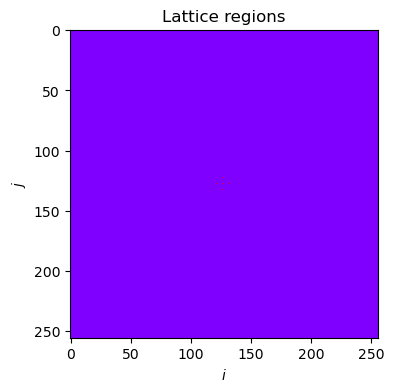

In [7]:
plot_lattice_regions(region_ids)

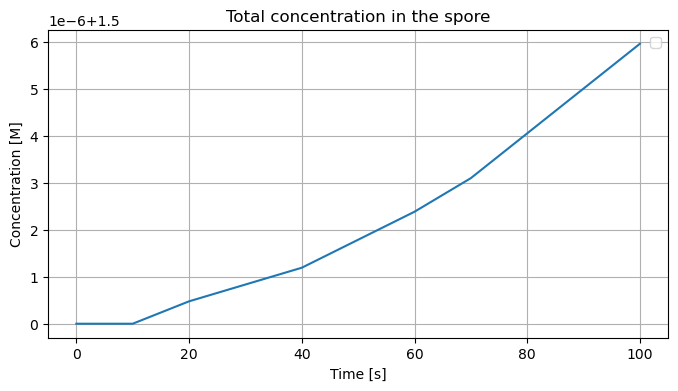

In [18]:
plot_concentration_evolution(c_solutions, times)

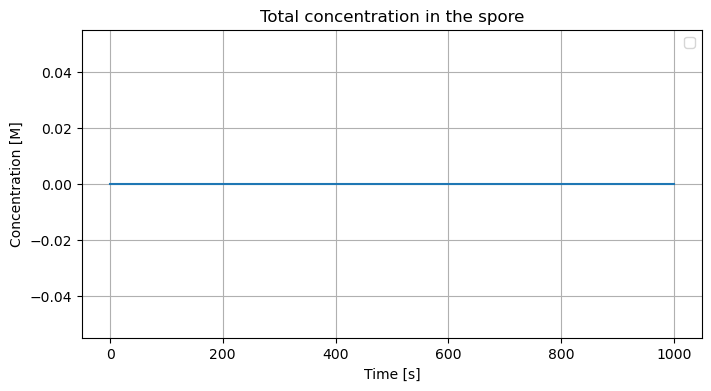

In [ ]:
times, c_frames, params = get_concentration_evolution_from_file("250403_mid_res_implicit_vs_explicit_model_1", "cluster_size_1_dist_1")
plot_concentration_evolution(c_frames, times)

Plotting frames: [1, 11]


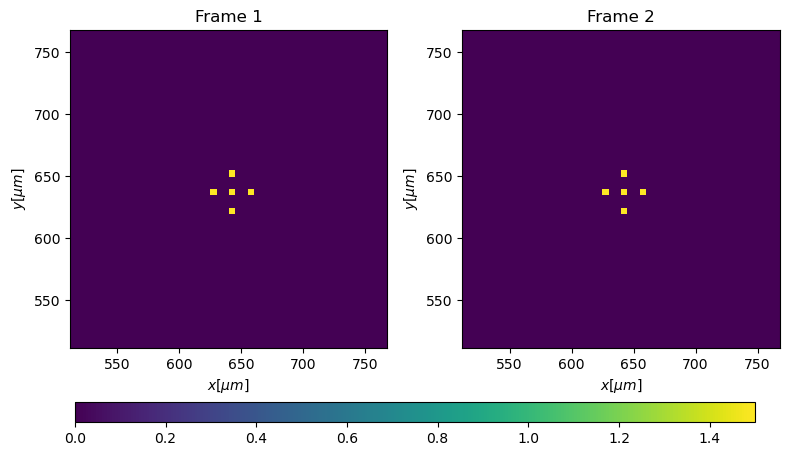

In [40]:
times, concentrations, params = get_concentration_evolution_from_file("250403_mid_res_implicit_vs_explicit_model_1", "cluster_size_2_dist_1", get_frames=true)
plot_concentration_lattice(concentrations, params[:dx], frame_indices=[1,11])